In [215]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection


c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, 
                cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, 
               s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, 
               alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, 
                     cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, 
                           colorscale=colorscale, cdiscrete=cdiscrete, 
                           psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 

print("Loaded")

Loaded


In [216]:
data = pd.read_csv("data/NNLM_Courses7.csv", encoding='latin1')

In [217]:
data.head(10)

,title,health_care_providers,hospital_libraries,nlm_resources,rdm,public_health,pubmed,aou,consumer_health,public_libraries,general_public,community_engagement_outreach,health_science_libraries,bioinformatics,ce_category,ce_eligibity,class_retired,published
0,A Bird's Eye View of Health Data Standards,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,NaN,yes,no,yes
1,A Glimpse at the Public Health Digital Library...,no,no,no,no,yes,no,no,no,no,no,no,no,no,NaN,no,no,yes
2,A New PubMed: Highlights for Information Profe...,no,no,no,no,no,yes,no,no,NaN,no,no,no,no,NaN,yes,no,yes
3,ABCs of DNA: Unraveling the Mystery of Genetic...,no,no,no,no,no,no,no,yes,yes,no,no,no,no,CHIS,yes,no,yes
4,"Activate, Collaborate, and Educate: Health Out...",no,no,no,no,yes,no,yes,yes,no,no,no,no,no,CHIS,yes,no,yes
5,Are You Ready? Essential Disaster Health Infor...,no,no,no,no,yes,no,no,yes,yes,no,yes,no,no,"CHIS, DIS",yes,no,yes
6,Astronaut Health: Health Information Resources...,no,no,no,no,no,no,no,yes,yes,no,no,no,no,NaN,yes,no,yes
7,Beginner Public Health Digital Library Quick S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
8,Beginner Public Health Digital Library Quick S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
9,Beyond an Apple a Day: Providing Consumer Heal...,yes,no,no,no,no,no,no,yes,yes,no,no,no,no,CHIS,yes,no,yes


In [218]:
data.isnull().sum() / data.shape[0] * 100.00

title                             0.000000
health_care_providers            24.096386
hospital_libraries               24.096386
nlm_resources                    24.096386
rdm                              24.096386
public_health                    24.096386
pubmed                           24.096386
aou                              24.096386
consumer_health                  24.096386
public_libraries                 25.301205
general_public                   22.891566
community_engagement_outreach    24.096386
health_science_libraries         27.710843
bioinformatics                   57.831325
ce_category                      67.469880
ce_eligibity                     16.867470
class_retired                    18.072289
published                         0.000000
dtype: float64

In [219]:
data['health_care_providers'].value_counts(dropna=False)

no      31
no      22
NaN     20
yes     10
Name: health_care_providers, dtype: int64

In [220]:
data = data.replace("no ", "no")

In [221]:
data['health_care_providers'].value_counts(dropna=False)

no      53
NaN     20
yes     10
Name: health_care_providers, dtype: int64

In [222]:
data['hospital_libraries'].value_counts(dropna=False)

no      47
NaN     20
yes     11
yes      5
Name: hospital_libraries, dtype: int64

In [223]:
data = data.replace("yes ", "yes")

In [224]:
data['hospital_libraries'].value_counts(dropna=False)

no     47
NaN    20
yes    16
Name: hospital_libraries, dtype: int64

no     58
NaN    20
yes     5
Name: aou, dtype: int64
no     69.879518
NaN    24.096386
yes     6.024096
Name: aou, dtype: float64


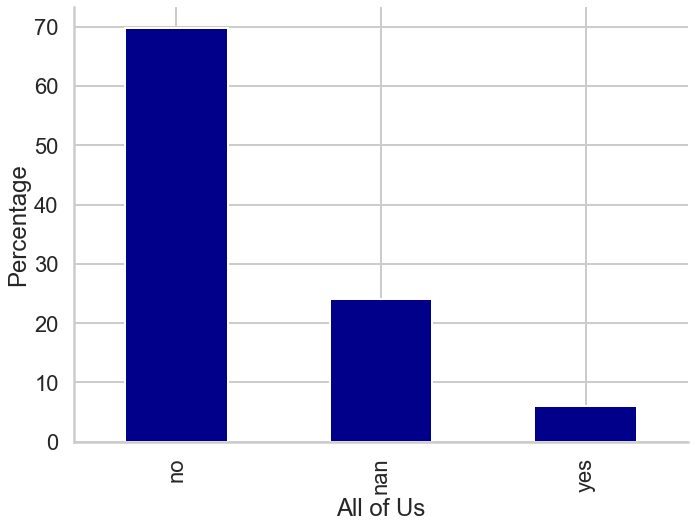

In [225]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
allofuscount = data['aou'].value_counts(dropna=False)
allofus = data['aou'].value_counts(dropna=False) / data.shape[0] * 100
allofus.plot(kind='bar',color='#00008b')
plt.xlabel('All of Us')
plt.ylabel('Percentage')
print(allofuscount)
print(allofus)
sns.despine()


In [226]:
data = data.replace("bo ", "no")

In [227]:
aou_classes = []
for i in data['title']:
    i = data['title'].loc[data['aou'] == 'yes']
    aou_classes.append(i)
    break


In [228]:
print(aou_classes)

[4     Activate, Collaborate, and Educate: Health Out...
35                          Grants and Proposal Writing
39                                   How PubMedÎÂ Works
55    National Library of Medicine Resources for Cit...
65                                         PNR Partners
Name: title, dtype: object]


In [229]:
health_care_providers = []
for i in data['title']:
    i = data['title'].loc[data['health_care_providers'] == 'yes']
    health_care_providers.append(i)
    break



In [230]:
print(health_care_providers)


[0            A Bird's Eye View of Health Data Standards
9     Beyond an Apple a Day: Providing Consumer Heal...
10    Beyond the Binary: Health Resources for Sexual...
14    Chemicals, Drugs and Genetics: Searching PubMe...
17    ClinicalTrials.gov: Results Reporting, Unique ...
30    Food for Thought: Exploring Nutrition Informat...
32    From Beyond Our Borders: Providing Multilingua...
39                                   How PubMedÎÂ Works
48                                   MAR Special Topics
68    PubMed and Beyond: Clinical Resources from the...
Name: title, dtype: object]


In [231]:
hospital_libraries = []
for i in data['title']:
    i = data['title'].loc[data['hospital_libraries'] == 'yes']
    hospital_libraries.append(i)
    break



In [232]:
print(hospital_libraries)

[0            A Bird's Eye View of Health Data Standards
10    Beyond the Binary: Health Resources for Sexual...
16    Clinical Information, Librarians and the NLM: ...
17    ClinicalTrials.gov: Results Reporting, Unique ...
20    Dissemination and Disasters: Using Information...
23                        Drug Terminologies and Rxnorm
24    Effective Health Communication and Health Lite...
30    Food for Thought: Exploring Nutrition Informat...
32    From Beyond Our Borders: Providing Multilingua...
35                          Grants and Proposal Writing
39                                   How PubMedÎÂ Works
48                                   MAR Special Topics
56                             NER Hospital Librarians 
57                 New England e-Science Webinar Series
68    PubMed and Beyond: Clinical Resources from the...
81                    Wellness in the Library Workplace
Name: title, dtype: object]


In [233]:
nlm_resources = []
for i in data['title']:
    i = data['title'].loc[data['nlm_resources'] == 'yes']
    nlm_resources.append(i)
    break

In [234]:
print(nlm_resources)

[0            A Bird's Eye View of Health Data Standards
17    ClinicalTrials.gov: Results Reporting, Unique ...
18    Combatting Information Fatigue: Health Informa...
20    Dissemination and Disasters: Using Information...
29                  Finding and Using Health Statistics
30    Food for Thought: Exploring Nutrition Informat...
32    From Beyond Our Borders: Providing Multilingua...
35                          Grants and Proposal Writing
39                                   How PubMedÎÂ Works
45                       LinkOut Consolidation Webinars
48                                   MAR Special Topics
55    National Library of Medicine Resources for Cit...
56                             NER Hospital Librarians 
57                 New England e-Science Webinar Series
60                                  NNLM Resource Picks
62    Online Resources to Support Evidence-Based Pra...
63    Owning Your Health: Wellness Resources for You...
68    PubMed and Beyond: Clinical Resources fro

In [235]:
rdm = []
for i in data['title']:
    i = data['title'].loc[data['rdm'] == 'yes']
    rdm.append(i)
    break

In [236]:
print(rdm)

[0            A Bird's Eye View of Health Data Standards
16    Clinical Information, Librarians and the NLM: ...
19    Cool Creative Communications: Dazzling Data Vi...
23                        Drug Terminologies and Rxnorm
29                  Finding and Using Health Statistics
32    From Beyond Our Borders: Providing Multilingua...
39                                   How PubMedÎÂ Works
41    Insider's Guide to Accessing NLM Data: EDirect...
46    Making Sense of Numbers: Understanding Risks a...
59         NNLM Research Data Management Webinar Series
65                                         PNR Partners
Name: title, dtype: object]


In [237]:
public_health = []
for i in data['title']:
    i = data['title'].loc[data['public_health'] == 'yes']
    public_health.append(i)
    break

In [238]:
print(public_health)

[1     A Glimpse at the Public Health Digital Library...
4     Activate, Collaborate, and Educate: Health Out...
5     Are You Ready? Essential Disaster Health Infor...
10    Beyond the Binary: Health Resources for Sexual...
18    Combatting Information Fatigue: Health Informa...
20    Dissemination and Disasters: Using Information...
29                  Finding and Using Health Statistics
32    From Beyond Our Borders: Providing Multilingua...
33    From Problem to Prevention: Evidence-Based Pub...
36                   Graphic Medicine: Beyond the Books
39                                   How PubMedÎÂ Works
43    Introduction to Health Reference: Ethics and B...
48                                   MAR Special Topics
62    Online Resources to Support Evidence-Based Pra...
75                          Serving Diverse Communities
76             Set up your outside tool to use the PHDL
78    True north: Navigating Your Way to Freely Avai...
Name: title, dtype: object]


In [239]:
pubmed = []
for i in data['title']:
    i = data['title'].loc[data['pubmed'] == 'yes']
    pubmed.append(i)
    break

In [240]:
print(pubmed)

[2     A New PubMed: Highlights for Information Profe...
10    Beyond the Binary: Health Resources for Sexual...
13                                            Boost Box
33    From Problem to Prevention: Evidence-Based Pub...
50                    MeSH Changes and PubMed Searching
62    Online Resources to Support Evidence-Based Pra...
69                    PubMed for Librarians - On Demand
Name: title, dtype: object]


In [241]:
public_libraries = []
for i in data['title']:
    i = data['title'].loc[data['public_libraries'] == 'yes']
    public_libraries.append(i)
    break

In [242]:
print(public_libraries)

[3     ABCs of DNA: Unraveling the Mystery of Genetic...
5     Are You Ready? Essential Disaster Health Infor...
6     Astronaut Health: Health Information Resources...
9     Beyond an Apple a Day: Providing Consumer Heal...
10    Beyond the Binary: Health Resources for Sexual...
17    ClinicalTrials.gov: Results Reporting, Unique ...
31    From A(ddiction) to Z(its): Supporting Teens w...
32    From Beyond Our Borders: Providing Multilingua...
35                          Grants and Proposal Writing
36                   Graphic Medicine: Beyond the Books
37    Health and Wellness @ the Library: The Essenti...
38                         Health Statistics on the Web
44                                  Kernel of Knowledge
46    Making Sense of Numbers: Understanding Risks a...
55    National Library of Medicine Resources for Cit...
65                                         PNR Partners
75                          Serving Diverse Communities
77    Stand Up for Health: Health and Wellness 

In [243]:
general_public = []
for i in data['title']:
    i = data['title'].loc[data['general_public'] == 'yes']
    general_public.append(i)
    break

In [244]:
print(general_public)

[20    Dissemination and Disasters: Using Information...
32    From Beyond Our Borders: Providing Multilingua...
39                                   How PubMedÎÂ Works
43    Introduction to Health Reference: Ethics and B...
48                                   MAR Special Topics
55    National Library of Medicine Resources for Cit...
79    Trusted Health Resources for Parents and Careg...
Name: title, dtype: object]


In [245]:
consumer_health = []
for i in data['title']:
    i = data['title'].loc[data['consumer_health'] == 'yes']
    consumer_health.append(i)
    break

In [246]:
print(consumer_health)

[3     ABCs of DNA: Unraveling the Mystery of Genetic...
4     Activate, Collaborate, and Educate: Health Out...
5     Are You Ready? Essential Disaster Health Infor...
6     Astronaut Health: Health Information Resources...
9     Beyond an Apple a Day: Providing Consumer Heal...
10    Beyond the Binary: Health Resources for Sexual...
17    ClinicalTrials.gov: Results Reporting, Unique ...
18    Combatting Information Fatigue: Health Informa...
24    Effective Health Communication and Health Lite...
30    Food for Thought: Exploring Nutrition Informat...
31    From A(ddiction) to Z(its): Supporting Teens w...
34    Getting the Right Information to Patients Usin...
37    Health and Wellness @ the Library: The Essenti...
39                                   How PubMedÎÂ Works
46    Making Sense of Numbers: Understanding Risks a...
48                                   MAR Special Topics
54    More Than a Bandage: Health Information Resour...
55    National Library of Medicine Resources fo

In [247]:
community_engagement_outreach = []
for i in data['title']:
    i = data['title'].loc[data['community_engagement_outreach'] == 'yes']
    community_engagement_outreach.append(i)
    break

In [248]:
print(community_engagement_outreach)

[5     Are You Ready? Essential Disaster Health Infor...
10    Beyond the Binary: Health Resources for Sexual...
17    ClinicalTrials.gov: Results Reporting, Unique ...
20    Dissemination and Disasters: Using Information...
25                   EvalBasics 1: Community Assessment
26       EvalBasics 2: Planning Outcomes-Based Programs
27    EvalBasics 3: Data Collection for Program Eval...
28    EvalBasics 4: Data Analysis for Program Evalua...
32    From Beyond Our Borders: Providing Multilingua...
33    From Problem to Prevention: Evidence-Based Pub...
35                          Grants and Proposal Writing
36                   Graphic Medicine: Beyond the Books
48                                   MAR Special Topics
55    National Library of Medicine Resources for Cit...
75                          Serving Diverse Communities
Name: title, dtype: object]


In [249]:
health_science_libraries = []
for i in data['title']:
    i = data['title'].loc[data['health_science_libraries'] == 'yes']
    health_science_libraries.append(i)
    break

In [250]:
print(health_science_libraries)

[10    Beyond the Binary: Health Resources for Sexual...
14    Chemicals, Drugs and Genetics: Searching PubMe...
17    ClinicalTrials.gov: Results Reporting, Unique ...
18    Combatting Information Fatigue: Health Informa...
20    Dissemination and Disasters: Using Information...
23                        Drug Terminologies and Rxnorm
24    Effective Health Communication and Health Lite...
30    Food for Thought: Exploring Nutrition Informat...
32    From Beyond Our Borders: Providing Multilingua...
33    From Problem to Prevention: Evidence-Based Pub...
35                          Grants and Proposal Writing
36                   Graphic Medicine: Beyond the Books
39                                   How PubMedÎÂ Works
43    Introduction to Health Reference: Ethics and B...
48                                   MAR Special Topics
81                    Wellness in the Library Workplace
Name: title, dtype: object]


In [251]:
bioinformatics = []
for i in data['title']:
    i = data['title'].loc[data['bioinformatics'] == 'yes']
    bioinformatics.append(i)
    break

In [192]:
print(bioinformatics)

[12    Bioinformatics Education
39          How PubMedÎÂ Works
Name: title, dtype: object]


In [257]:
len(data.bioinformatics[data['bioinformatics'] == 'yes'])

2

In [261]:
print("The number of All of Us classes: " , len(data.aou[data['aou'] == 'yes']))
print("The number of Bioinformatics classes: " , len(data.bioinformatics[data['bioinformatics'] == 'yes']))
print("The number of Community Engagement/Outreach classes: ", len(data.community_engagement_outreach[data['community_engagement_outreach'] == 'yes']))
print("The number of Consumer Health classes: " , len(data.consumer_health[data['consumer_health'] == 'yes']))
print("The number of General Public classes: " , len(data.general_public[data['general_public'] == 'yes']))
print("The number of Health Care Providers classes: " , len(data.health_care_providers[data['health_care_providers'] == 'yes']))
print("The number of Health Science Libraries classes: " , len(data.health_science_libraries[data['health_science_libraries'] == 'yes']))
print("The number of Hospital Libraries classes: " , len(data.hospital_libraries[data['hospital_libraries'] == 'yes']))
print("The number of NLM Resources classes: " , len(data.nlm_resources[data['nlm_resources'] == 'yes']))
print("The number of Public Health classes: " , len(data.public_health[data['public_health'] == 'yes']))
print("The number of Public Libraries classes: " , len(data.public_libraries[data['public_libraries'] == 'yes']))
print("The number of Pubmed classes: " , len(data.pubmed[data['pubmed'] == 'yes']))
print("The number of Research Data Management classes: ", len(data.rdm[data['rdm'] == 'yes']))


The number of All of Us classes:  5
The number of Bioinformatics classes:  2
The number of Community Engagement/Outreach classes:  15
The number of Consumer Health classes:  25
The number of General Public classes:  7
The number of Health Care Providers classes:  10
The number of Health Science Libraries classes:  16
The number of Hospital Libraries classes:  16
The number of NLM Resources classes:  22
The number of Public Health classes:  17
The number of Public Libraries classes:  21
The number of Pubmed classes:  7
The number of Research Data Management classes:  11


In [300]:
print("Percentage of All of Us classes: " , len(data.aou[data['aou'] == 'yes']) / len(data.title))
print("Percentage of Bioinformatics classes: " , len(data.bioinformatics[data['bioinformatics'] == 'yes']) / len(data.title))
print("Percentage of Community Engagement/Outreach classes: ", len(data.community_engagement_outreach[data['community_engagement_outreach'] == 'yes'])/ len(data.title))
print("Percentage of Consumer Health classes: " , len(data.consumer_health[data['consumer_health'] == 'yes'])/ len(data.title))
print("Percentage of General Public classes: " , len(data.general_public[data['general_public'] == 'yes'])/ len(data.title))
print("Percentage of Health Care Providers classes: " , len(data.health_care_providers[data['health_care_providers'] == 'yes'])/ len(data.title))
print("Percentage of Health Science Libraries classes: " , len(data.health_science_libraries[data['health_science_libraries'] == 'yes'])/ len(data.title))
print("Percentage of Hospital Libraries classes: " , len(data.hospital_libraries[data['hospital_libraries'] == 'yes'])/ len(data.title))
print("Percentage of NLM Resources classes: " , len(data.nlm_resources[data['nlm_resources'] == 'yes'])/ len(data.title))
print("Percentage of Public Health classes: " , len(data.public_health[data['public_health'] == 'yes'])/ len(data.title))
print("Percentage of Public Libraries classes: " , len(data.public_libraries[data['public_libraries'] == 'yes'])/ len(data.title))
print("Percentage of Pubmed classes: " , len(data.pubmed[data['pubmed'] == 'yes'])/ len(data.title))
print("Percentage of Research Data Management classes: ", len(data.rdm[data['rdm'] == 'yes'])/ len(data.title))

Percentage of All of Us classes:  0.060240963855421686
Percentage of Bioinformatics classes:  0.024096385542168676
Percentage of Community Engagement/Outreach classes:  0.18072289156626506
Percentage of Consumer Health classes:  0.30120481927710846
Percentage of General Public classes:  0.08433734939759036
Percentage of Health Care Providers classes:  0.12048192771084337
Percentage of Health Science Libraries classes:  0.1927710843373494
Percentage of Hospital Libraries classes:  0.1927710843373494
Percentage of NLM Resources classes:  0.26506024096385544
Percentage of Public Health classes:  0.20481927710843373
Percentage of Public Libraries classes:  0.25301204819277107
Percentage of Pubmed classes:  0.08433734939759036
Percentage of Research Data Management classes:  0.13253012048192772


In [328]:
AoU_Count = len(data.aou[data['aou'] == 'yes'])
Bioinformatics_Count = len(data.bioinformatics[data['bioinformatics'] == 'yes'])
Community_Engagement_Outreach_Count = len(data.community_engagement_outreach[data['community_engagement_outreach'] == 'yes'])
Consumer_Health_Count= len(data.consumer_health[data['consumer_health'] == 'yes'])
General_Public_Count=len(data.general_public[data['general_public'] == 'yes'])
Health_Care_Providers_Count = len(data.health_care_providers[data['health_care_providers'] == 'yes'])
Health_Science_Libraries_Count = len(data.health_science_libraries[data['health_science_libraries'] == 'yes'])
Hospital_Libraries_Count = len(data.hospital_libraries[data['hospital_libraries'] == 'yes'])
NLM_Resources_Count = len(data.nlm_resources[data['nlm_resources'] == 'yes'])
Public_Health_Count= len(data.public_health[data['public_health'] == 'yes'])
Public_Libraries_Count = len(data.public_libraries[data['public_libraries'] == 'yes'])
Pubmed_Count = len(data.pubmed[data['pubmed'] == 'yes'])
RDM_Count = len(data.rdm[data['rdm'] == 'yes'])


In [329]:
import matplotlib
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [336]:
class_category = [AoU_Count, Bioinformatics_Count, Community_Engagement_Outreach_Count, Consumer_Health_Count,
                  General_Public_Count, Health_Care_Providers_Count, Health_Science_Libraries_Count,
                  Hospital_Libraries_Count, NLM_Resources_Count, Public_Health_Count, Public_Libraries_Count,
                  Pubmed_Count, RDM_Count]

In [337]:
class_category

[5, 2, 15, 25, 7, 10, 16, 16, 22, 17, 21, 7, 11]